# Imports

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Create UserGenerator instance

In [2]:
from synabon.users import UserGenerator

In [3]:
n_users = 1000
n_interactions = 10
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [4]:
from datetime import timedelta
start_dt + timedelta(days=7)

datetime.datetime(2023, 1, 8, 0, 0)

In [5]:
ug = UserGenerator(n_users, n_interactions)

In [6]:
from functools import partial
scale = 1_000
balance_generator = partial(np.random.exponential, scale=scale)

In [7]:
df = ug.get_data(balance_generator, start_dt, end_dt)

In [8]:
df.head(10)

,user_id,user_balance,interaction_sum,interaction_type,date
0,b04ac3b4-6457-467b-8591-ecca0e0b811d,229.707990,NaN,registration,2023-01-01
1606,3ae03443-5f2e-4220-8103-5847ace28ef9,1285.812729,NaN,registration,2023-01-01
9471,79d74230-6548-4eff-9d49-8e739e01e169,866.172394,NaN,registration,2023-01-01
7414,ab9c98d1-a599-4e97-97fa-7510baa5103d,2064.961982,NaN,registration,2023-01-01
9889,899b7d80-5d21-4d25-a262-e4cb14876475,1187.522363,NaN,registration,2023-01-01
1595,304d9678-bc97-4649-9f86-3a8296aee0c9,985.017814,NaN,registration,2023-01-01
4059,28f61b80-6f09-4aa9-ae4c-e3b2826a030a,587.896981,NaN,registration,2023-01-01
7425,f722fbbd-71ed-4220-8ac4-79bc6454aca9,1270.793318,NaN,registration,2023-01-01
1584,067c6995-be93-4012-a979-794f8d2c3649,121.000322,NaN,registration,2023-01-01
10571,6ff954ac-63e9-4d62-b42a-4c4acfc2584e,818.617718,NaN,registration,2023-01-01


In [9]:
df.shape

(11000, 5)

In [10]:
df["user_id"].nunique()

1000

# Let's see the distribution of balances at the start

In [11]:
mask = df["interaction_type"] == "registration"
df_start = df[mask]
df_start.shape

(1000, 5)

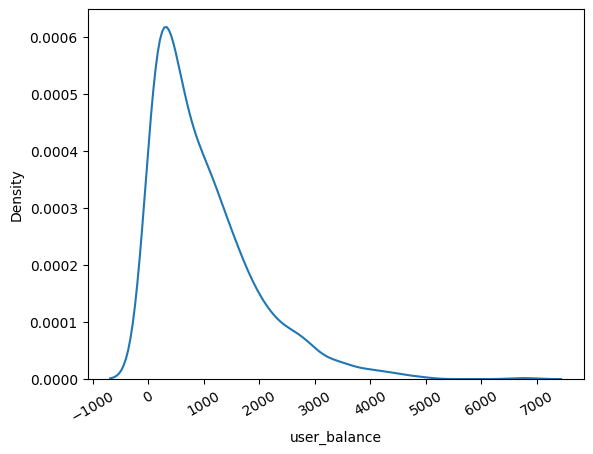

In [12]:
g = sns.kdeplot(x="user_balance", data=df_start)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's see how the balances of some users changed

In [13]:
user_ids = np.random.choice(df["user_id"].unique(), size=3)
mask = (df["user_id"].isin(user_ids))
user_df = df[mask]
user_df.head(5)

,user_id,user_balance,interaction_sum,interaction_type,date
9801,0585b25f-6eb2-4ea7-a5a3-ceb0caf679e5,1981.731729,NaN,registration,2023-01-01 00:00:00
3025,b06c3881-1504-4ce0-a81e-c09d5232c0ae,3033.951212,NaN,registration,2023-01-01 00:00:00
9955,6ce2b4ea-ee12-4271-a71b-453ecf631423,834.576795,NaN,registration,2023-01-01 00:00:00
9802,0585b25f-6eb2-4ea7-a5a3-ceb0caf679e5,2205.463738,223.732009,transaction,2023-01-02 09:51:00
3026,b06c3881-1504-4ce0-a81e-c09d5232c0ae,3070.834210,36.882999,transaction,2023-01-02 10:13:34


In [14]:
user_df.shape

(33, 5)

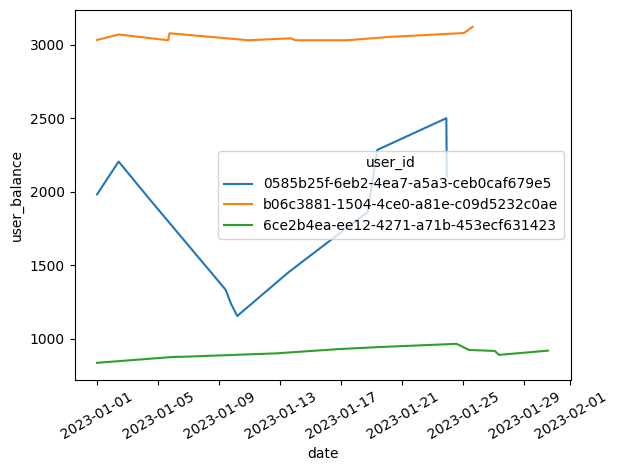

In [15]:
g = sns.lineplot(x="date", y="user_balance", hue="user_id", data=user_df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of balances at the end

In [16]:
df_last = df.sort_values(by="date").groupby(by="user_id").tail(1)

In [17]:
df_last.head()

,user_id,user_balance,interaction_sum,interaction_type,date
7941,9292191c-a242-426a-9036-4323ec077100,553.382634,-41.751923,transaction,2023-01-17 12:53:51
1308,df0ea1f0-93a3-4d6b-960f-31e669afda4d,1271.876935,-15.692393,transaction,2023-01-17 20:49:17
1715,25a7a004-9bab-47f6-a788-4f39b355752c,167.257692,-22.377681,transaction,2023-01-18 09:02:03
3739,5920b1dc-ca4e-441b-881c-a2f697e20238,871.764404,69.963396,transaction,2023-01-18 13:01:07
6599,2befe8b3-19f5-4425-8a54-9d5019efa5e0,1385.719293,9.296793,transaction,2023-01-18 20:48:06


In [18]:
df_last.shape

(1000, 5)

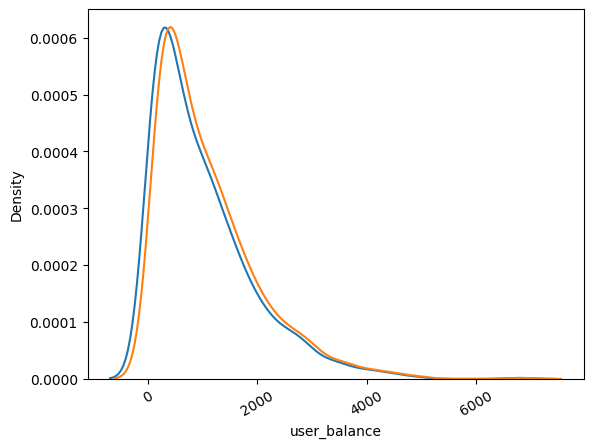

In [19]:
g = sns.kdeplot(x="user_balance", data=df_start)
g = sns.kdeplot(x="user_balance", data=df_last)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [20]:
print(f"MEAN Before: {np.mean(df_start['user_balance'])}")
print(f"MEAN After: {np.mean(df_last['user_balance'])}")


MEAN Before: 1002.3130884626333
MEAN After: 1102.3676752053948


In [21]:
df_start[df_start['user_balance'] < 0]["user_id"].count()

0

In [22]:
df_last[df_last['user_balance'] < 0]["user_id"].count()

0